# CF-netCDF with cfdm, cf-python and cf-plot: a demo in under an hour

----

## A ~45 minute illustration of the basic functionality of three inter-related Python libraries\* underpinned by [the CF data model](https://gmd.copernicus.org/articles/10/4619/2017/) for working with CF-netCDF.

\* these data tools are developed & maintained by the [CMS team](https://www.ncas.ac.uk/en/cms) of the National Centre for Atmospheric Science (NCAS)

A recap of the data tools and their respective scopes are:

* #### [cfdm](https://ncas-cms.github.io/cfdm/) (`cfdm` module): reference implementation of the CF data model with mostly only the functionality required to read and write datasets, and to create, modify and inspect field constructs in memory;
* #### [cf-python](https://ncas-cms.github.io/cf-python/) (`cf`): CF-compliant geoscientific data analysis library which builds upon `cfdm` to provide much higher-level functionality, for example statistical operations, collapsing, subspacing, and regridding;
* #### [cf-plot](http://ajheaps.github.io/cf-plot/) (`cfplot`): set of Python functions for making common visualisations such as contour, vector and line plots that are used often by geoscientists.

*Note*: this summary focuses on use of these tools *with netCDF (`.nc`) datasets only*, however cfdm and cf-python can recognise and map to field constructs other formats, namely CDL (`.cdl`) of netCDF and (for cf-python only) PP (`.pp`) and UM fields files (`.ff`), and cf-plot also accepts pure NumPy arrays as input.

## Learning objectives:

### ~10 minutes for each of four segments demonstrating some (but by no means all!) of the capabilities of the tools:

1. **From netCDF to field constructs and back**: read in netCDF files, create a new field construct by modification of data and metadata and then write out the new field to a new netCDF file.
2. **Basic data analysis, with plotting of results**: Plot the data before and after applying statistical collapses.
3. **Regridding domains, with plotting of results**:  plot the data before and after regridding across spherical and cartesian coordinate systems.
4. **Manipulating hierarchical groups**: create & inspect group structure for a netCDF-4 file, then flatten it out.

----

## 0. Setup

First let's setup the Notebook environment:

In [1]:
# Setup for nice outputs in this Jupyter Notebook (not required in interactive Python or a script)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Throughout this walk-through we will be working on some sample datasets, contained in `ncas_data`. Let's check what we have to work with, with a shell command:

In [2]:
# Note that in IPython ! preceeeds a shell command
!ls -1 ncas_data/

aaaaoa.pmh8dec.pp
alpine_precip_DJF_means.nc
data1.nc
data2.nc
data3.nc
data5.nc
IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc
land.nc
model_precip_DJF_means_low_res.nc
model_precip_DJF_means.nc
precip_1D_monthly.nc
precip_1D_yearly.nc
precip_2010.nc
precip_DJF_means.nc
qbo.nc
regions.nc
ta.nc
tripolar.nc
ua.nc
u_n216.nc
u_n96.nc
vaAMIPlcd_DJF.nc
va.nc
wapAMIPlcd_DJF.nc


So there are plenty of netCDF files to work with. Note there is a mixture of "classic" netCDF-3 and netCDF-4, as some futher shell commands illustrate:

In [3]:
# Note that in IPython ! preceeeds a shell command
!ncdump -k ncas_data/data1.nc
!ncdump -k ncas_data/data2.nc

netCDF-4
classic


Let's start, naturally, by importing the CF data tools modules. Note the standard alias used for `cfplot` e.g. within the module documentation:

In [4]:
import cfdm
import cf
import cfplot as cfp

Great. We are now all ready to go using these modules on the netCDF datasets!

----

## 1. From netCDF to field constructs and back

### Read in netCDF files, create a new field construct by modification of data and metadata and then write out the new field to a new netCDF file

In [5]:
# Read a data file
field_list = cf.read('ncas_data/ua.nc')

In [6]:
field = field_list[0]

In [7]:
field

<CF Field: eastward_wind(time(1), atmosphere_hybrid_height_coordinate(1), latitude(145), longitude(192)) m s-1>

In [8]:
print(field)  # more detail

Field: eastward_wind (ncvar%ua)
-------------------------------
Data            : eastward_wind(time(1), atmosphere_hybrid_height_coordinate(1), latitude(145), longitude(192)) m s-1
Dimension coords: time(1) = [1978-09-01 06:00:00] 360_day
                : atmosphere_hybrid_height_coordinate(1) = [9.99820613861084] m
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.9375, ..., 359.0625] degrees_east
Coord references: standard_name:atmosphere_hybrid_height_coordinate
Domain ancils   : atmosphere_hybrid_height_coordinate(atmosphere_hybrid_height_coordinate(1)) = [9.99820613861084] m
                : long_name=vertical coordinate formula term: b(k)(atmosphere_hybrid_height_coordinate(1)) = [0.9988581538200378]
                : surface_altitude(latitude(145), longitude(192)) = [[2801.478759765625, ..., 0.0]] m


In [9]:
field.dump()   # maximal (metadata) detail!

-------------------------------
Field: eastward_wind (ncvar%ua)
-------------------------------
Conventions = 'CF-1.6'
_FillValue = 1e+20
associated_files = 'baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation
                    gridspecFile: gridspec_atmos_fx_HadGEM2-A_amip_r0i0p0.nc'
branch_time = 0.0
cmor_version = '2.7.1'
contact = 'chris.d.jones@metoffice.gov.uk, mark.webb@metoffice.gov.uk'
creation_date = '2011-07-27T15:42:32Z'
experiment = 'AMIP'
experiment_id = 'amip'
forcing = 'GHG, Oz, SA, LU, Sl, Vl, BC, OC, (GHG = CO2, N2O, CH4, CFCs)'
frequency = '6hr'
history = '2011-07-27T15:42:32Z altered by CMOR: replaced missing value flag
           (-1.07374e+09) with standard missing value (1e+20).'
initialization_method = 1
institute_id = 'MOHC'
institution = 'Met Office Hadley Centre, Fitzroy Road, Exeter, Devon, EX1 3PB,
               UK, (http://www.metoffice.gov.uk)'
long_name = 'Eastward Wind'
missing_value = 1e+20
mo_runid = 'akpcd'
model_id = 'HadGEM2-A'
modeling_realm

In [10]:
squared_field = field * field

In [11]:
print(field.data)
print(squared_field.data)

[[[[-4.665771484375, ..., 0.40234375]]]] m s-1
[[[[21.769424438476562, ..., 0.1618804931640625]]]] Gy


In [12]:
print(field.units)
print(squared_field.units)

m s-1
Gy


In [13]:
print(field.standard_name)
print(squared_field.standard_name)  # this will fail! (explanation to follow!)

eastward_wind


AttributeError: 'Field' has no 'standard_name' property

In [14]:
squared_field.standard_name = 'square_of_eastward_wind'

In [15]:
print(field.standard_name)
print(squared_field.standard_name)  # this now does not fail, as we have re-assigned a standard name

eastward_wind
square_of_eastward_wind


We can write out field constructs into netCDF files in any combination we wish. Let's squared field to a netCDF file:

In [16]:
cf.write(squared_field, 'squared_e_wind.nc')

In [17]:
# Note that in IPython ! preceeeds a shell command
!ls

a_summary_in_under_an_h.ipynb  grouped.nc  one_hour_summary.ipynb
demo_in_under_an_hour.ipynb    ncas_data   squared_e_wind.nc
flat.nc			       newfile.nc  thirty_minute_lab_tutorial.ipynb


In [18]:
! ncdump -h squared_e_wind.nc

netcdf squared_e_wind {
dimensions:
	time = UNLIMITED ; // (1 currently)
	lev = 1 ;
	bounds2 = 2 ;
	lat = 145 ;
	lon = 192 ;
variables:
	double time(time) ;
		time:units = "days since 1978-09-01" ;
		time:long_name = "time" ;
		time:standard_name = "time" ;
		time:calendar = "360_day" ;
		time:axis = "T" ;
	double lev_bnds(lev, bounds2) ;
		lev_bnds:formula = "z = a + b*orog" ;
		lev_bnds:formula_terms = "a: lev_bnds b: b orog: orog" ;
	double lev(lev) ;
		lev:positive = "up" ;
		lev:long_name = "hybrid height coordinate" ;
		lev:standard_name = "atmosphere_hybrid_height_coordinate" ;
		lev:units = "m" ;
		lev:formula = "z = a + b*orog" ;
		lev:axis = "Z" ;
		lev:bounds = "lev_bnds" ;
		lev:formula_terms = "a: lev_1 b: b orog: orog" ;
	double lat_bnds(lat, bounds2) ;
	double lat(lat) ;
		lat:units = "degrees_north" ;
		lat:long_name = "latitude" ;
		lat:standard_name = "latitude" ;
		lat:axis = "Y" ;
		lat:bounds = "lat_bnds" ;
	double lon_bnds(lon, bounds2) ;
	double lon(lon) ;
		lon:

*Here we have read in a field construct from netCDF, created a new field based on the other field's data and metadata, modified the metadata of the new field, and then written in out to a netCDF file.*

----

## 2. Basic data analysis, with plotting of results

### Plot the data before and after applying statistical collapses

In [19]:
a = cf.read('ncas_data/qbo.nc')[0]

In [20]:
print(a)

Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(398), pressure(37), latitude(2), longitude(48)) m s**-1
Dimension coords: time(398) = [1979-01-16 09:00:00, ..., 2012-02-15 09:00:00] gregorian
                : pressure(37) = [1000.0, ..., 1.0] mbar
                : latitude(2) = [30.0, 0.0] degrees_north
                : longitude(48) = [0.0, ..., 352.5] degrees_east


In [21]:
b = a.collapse('maximum', axes='T')  # temporal maximum

In [22]:
print(b)

Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(37), latitude(2), longitude(48)) m s**-1
Cell methods    : time(1): maximum
Dimension coords: time(1) = [1995-08-01 21:00:00] gregorian
                : pressure(37) = [1000.0, ..., 1.0] mbar
                : latitude(2) = [30.0, 0.0] degrees_north
                : longitude(48) = [0.0, ..., 352.5] degrees_east


In [23]:
b_sub = b.subspace(X=30)
print(b)

Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(37), latitude(2), longitude(48)) m s**-1
Cell methods    : time(1): maximum
Dimension coords: time(1) = [1995-08-01 21:00:00] gregorian
                : pressure(37) = [1000.0, ..., 1.0] mbar
                : latitude(2) = [30.0, 0.0] degrees_north
                : longitude(48) = [0.0, ..., 352.5] degrees_east


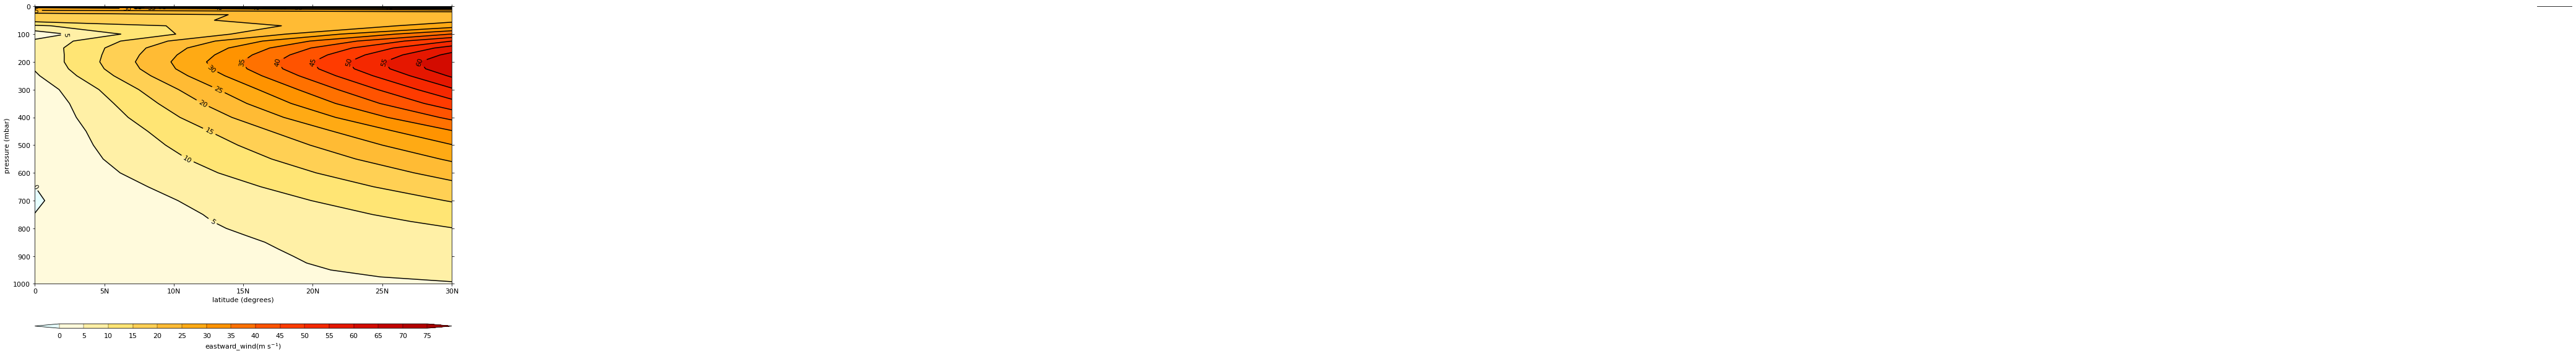

In [24]:
cfp.con(b_sub)

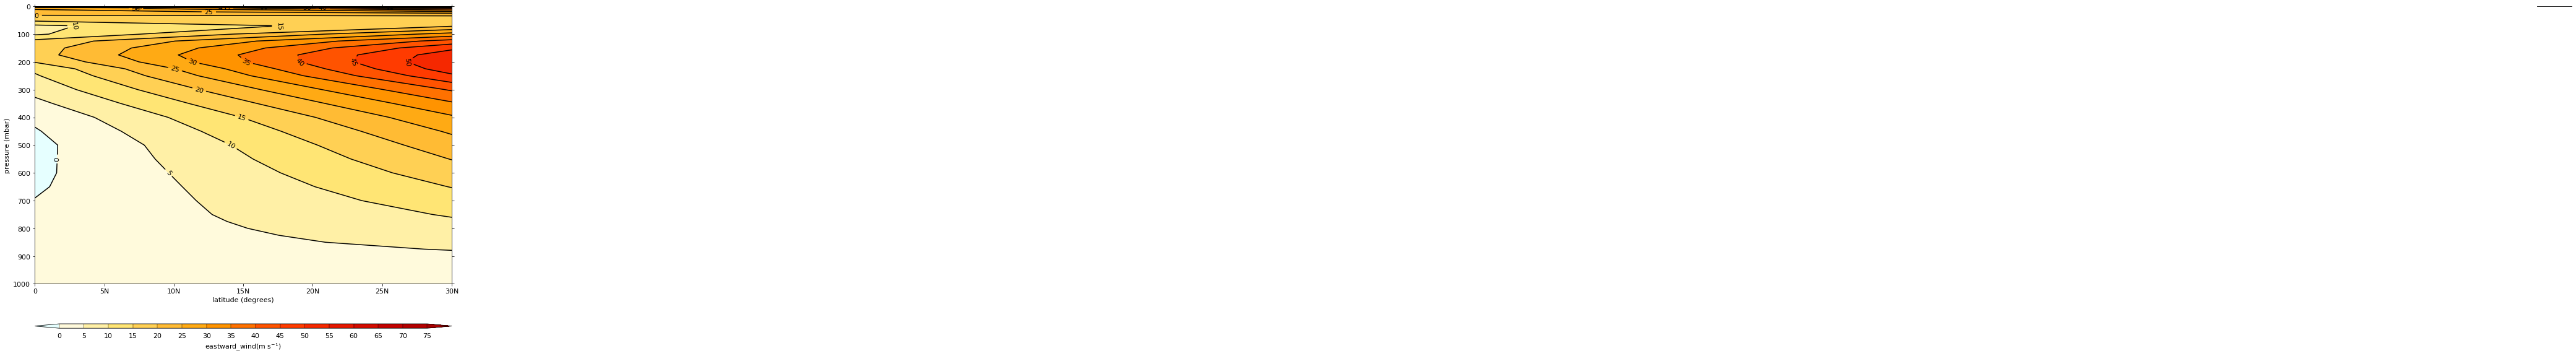

In [25]:
cfp.con(b.subspace(X=0))

In [26]:
c = a.collapse('mean', axes='X')  # horizontal mean

In [27]:
print(c)

Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(398), pressure(37), latitude(2), longitude(1)) m s**-1
Cell methods    : longitude(1): mean
Dimension coords: time(398) = [1979-01-16 09:00:00, ..., 2012-02-15 09:00:00] gregorian
                : pressure(37) = [1000.0, ..., 1.0] mbar
                : latitude(2) = [30.0, 0.0] degrees_north
                : longitude(1) = [176.25] degrees_east


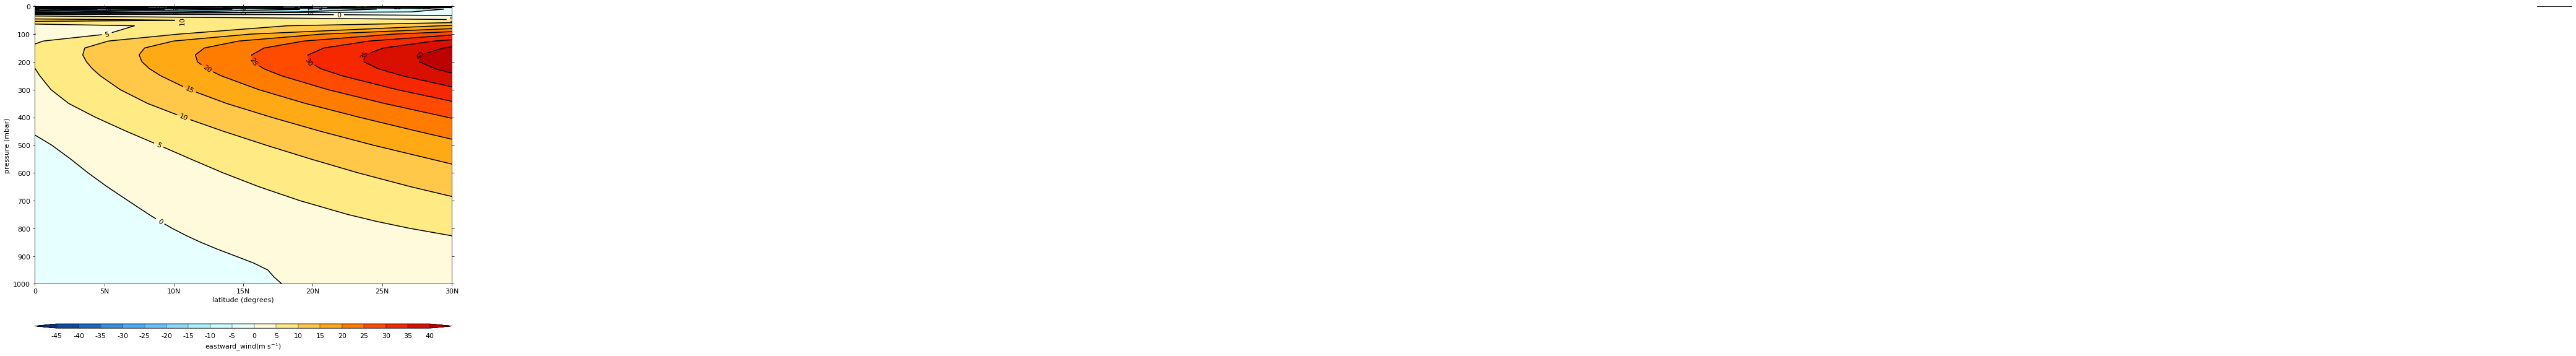

In [28]:
c_sub = c.subspace(T=cf.dt('1979-01-16 09:00:00'))

cfp.con(c_sub)

*That was a demo of some very basic statistical collapsing and sub-spacing.**

----

## 3. Regridding domains, with plotting of results

### Plot the data before and after regridding across spherical and cartesian coordinate systems

#### a) Regridding across spherical coordinate systems: conservative method as an example

Read in two fields, ``f`` and ``g``, where ``f`` is gridded at about twice the resolution of ``g``:

In [29]:
# Read in a precipitation field and inspect it
f = cf.read('ncas_data/precip_2010.nc')[0]
print(f)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(12), latitude(145), longitude(53)) mm
Dimension coords: long_name=time(12) = [2010-01-16 00:00:00, ..., 2010-12-16 00:00:00] gregorian
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(53) = [-33.75, ..., 63.75] degrees_east


In [30]:
# Read in another, lower-resolution, precipitation field and inspect it
g = cf.read('ncas_data/model_precip_DJF_means_low_res.nc')[0]
print(g)

Field: long_name=precipitation (ncvar%precip)
---------------------------------------------
Data            : long_name=precipitation(long_name=t(1), long_name=Surface(1), latitude(73), longitude(27)) mm/day
Cell methods    : long_name=t(1): mean
Dimension coords: long_name=t(1) = [1996-07-16 00:00:00] 360_day
                : long_name=Surface(1) = [0.0] level
                : latitude(73) = [-90.0, ..., 90.0] degrees_north
                : longitude(27) = [-33.75, ..., 63.75] degrees_east


Regrid the first field to the grid of the second. We use the `regrids` method of cf-python.

In [31]:
h_1 = f.regrids(g, method='patch')
h_2 = f.regrids(g, method='conservative')
h_1.equals(h_2)

False

Now let's inspect what we have, by plotting the field "before and after" (though actually we keep two different fields) the regridding:

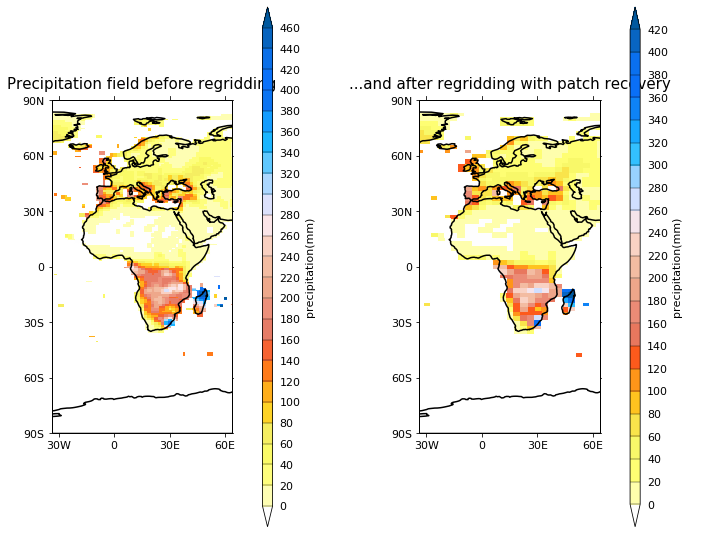

Comparing results fom different regridding methods:


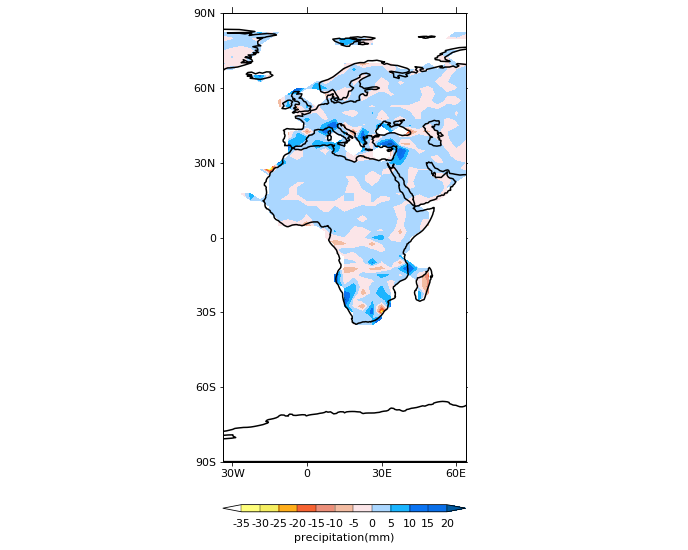

In [32]:
# Take some subspaces first:
f_sub = f[0]
h_1_sub = h_1[0]
h_2_sub = h_2[0]


# Customising the plots to look nicer
cfp.mapset()
#cfp.mapset(proj='robin')
cfp.cscale('rh_19lev')

cfp.gopen(rows=1, columns=2)
cfp.gpos(1)
cfp.con(f_sub, blockfill=True, lines=False, colorbar_orientation='vertical',
        title='Precipitation field before regridding')
cfp.gpos(2)
cfp.con(h_1_sub, blockfill=True, lines=False, colorbar_orientation='vertical',
        title='...and after regridding with patch recovery')
cfp.gclose()

print("Comparing results fom different regridding methods:")
cfp.con(h_2_sub - h_1_sub, lines=False)

As we expect, the regridded field resembles the original in its nature, but is at lower-resolution due to its new grid.

#### b) Regridding across cartesian coordinate systems: time series as an example

The term 'regridding' brings to mind a multi-dimensional grid e.g. over the earth's surface, but a 'grid' is really just a set of points in a multi-dimensional space. In 1D, this is just a series of data points.

Cartesian regridding can be used for 1 to 3 dimensions, so we can use it to "regrid" such a series, and let's use a time series as an example.

Again, start by reading in some (different) precipitation fields, in this case ``i`` and ``j`` which form a pair of time series with different domains/grids i.e. numbers of time data points:

In [33]:
# Read in a precipitation field and inspect it
i = cf.read('ncas_data/precip_1D_yearly.nc')[0]
print(i)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(10), long_name=latitude(1), long_name=longitude(1)) mm
Cell methods    : long_name=time(10): mean long_name=latitude(1): long_name=longitude(1): mean
Dimension coords: long_name=time(10) = [1981-07-02 00:00:00, ..., 1990-07-02 00:00:00] gregorian
                : long_name=latitude(1) = [0.0] degrees_north
                : long_name=longitude(1) = [0.0] degrees_east


In [34]:
j = cf.read('ncas_data/precip_1D_monthly.nc')[0]
print(j)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(120), long_name=latitude(1), long_name=longitude(1)) mm
Cell methods    : long_name=latitude(1): long_name=longitude(1): mean
Dimension coords: long_name=time(120) = [1981-01-16 00:00:00, ..., 1990-12-16 00:00:00] gregorian
                : long_name=latitude(1) = [0.0] degrees_north
                : long_name=longitude(1) = [0.0] degrees_east


Regrid linearly along the time axis 'T' and summarise the resulting field. This time, because we are working with cartesian coordinates, we need to use the `regridc` method on the field acting as the source domain.

For diversity, we use a different regridding method. Let's use linear interpolation, by setting `method='linear'`:

In [35]:
k = i.regridc(j, axes='T', method='linear')
print(k)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(120), long_name=latitude(1), long_name=longitude(1)) mm
Cell methods    : long_name=time(120): mean long_name=latitude(1): long_name=longitude(1): mean
Dimension coords: long_name=time(120) = [1981-01-16 00:00:00, ..., 1990-12-16 00:00:00] gregorian
                : long_name=latitude(1) = [0.0] degrees_north
                : long_name=longitude(1) = [0.0] degrees_east


Plot the time series before and after regridding

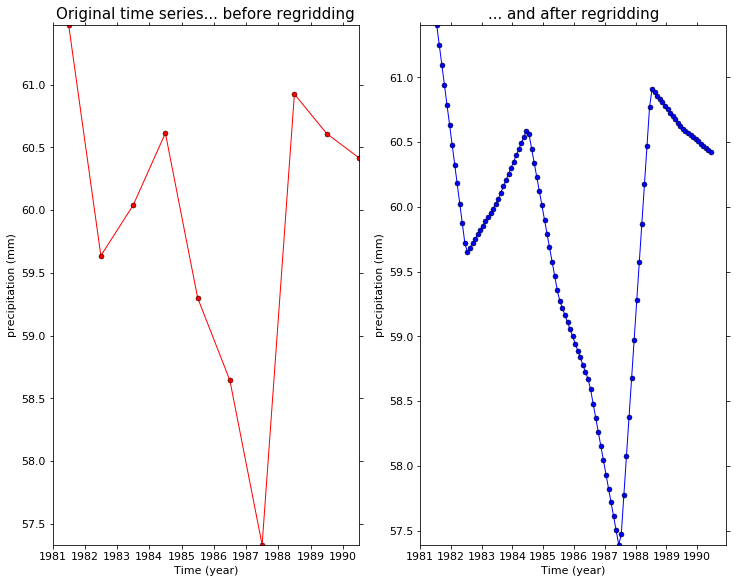

In [36]:
cfp.gopen(rows=1, columns=2)
cfp.gpos(1)
cfp.lineplot(i, marker='o', color='red',
             title='Original time series... before regridding')
cfp.gpos(2)
cfp.lineplot(k, marker='o', color='blue', title='... and after regridding')
cfp.gclose()

In this case, we've seen that regridding can apply not just to multi-dimensional coordinates but to *data series* (which are *1D "grids"*).

As you can see, again the nature of the regridding output is preserved, but the granularity has changed, in this case becoming higher.

----

## 3. Manipulating hierarchical groups

### Create & inspect group structure for a netCDF-4 file, then flatten it out

*That was a quick demonstration of regridding using both the `regrids` and `regridc` methods for spherical and cartesian coordinate systems respectively, showcasing three different interpolation methods.*

We want to look at groups so let's read in some fields from a netCDF-4 dataset:

In [37]:
# Note that in IPython ! preceeeds a shell command
!ncdump -k ncas_data/data1.nc

netCDF-4


Take the first field from the `FieldList`:

In [38]:
f = cf.read('ncas_data/data1.nc')[0]
print(f)

Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


Let's see if there is any group structure already:

In [39]:
f.nc_variable_groups()

()

So, we see that there is not. But, if we wanted groups, we could create some. A group structure that may be applied when writing to disk can be created from scratch with the netCDF interface, and cf-python provides methods that use this.

Here as an example we create a group structure, with `forecast` and `model` as named groups, and write it to disk:

In [40]:
f.set_property('comment', 'some general comment')
f.nc_set_group_attribute('comment', 'I am part of the model group, a sub-group of forecast')
f.nc_set_variable_groups(['forecast', 'model'])

f.construct('time').nc_set_variable_groups(['forecast'])

cf.write(f, 'grouped.nc')

Let's just check that we wrote out our file by reading it back in again and checking (alternatively, verify with `ncdump`):

In [41]:
g = cf.read('grouped.nc')[0]
print(g)
print(f)  # for comparison with original
g.equals(f)

Field: long_name=Potential vorticity (ncvar%/forecast/model/PV)
---------------------------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east
Field: long_name=Potential vorticity (ncvar%/forecast/model/PV)
---------------------------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320)

False

In [42]:
g.nc_variable_groups()

('forecast', 'model')

Those are the precise groups we just created, so all is good. We can also verify the groups have been created correctly by inspecting with `ncdump`:

In [43]:
# Note that in IPython ! preceeeds a shell command
!ncdump -h grouped.nc

netcdf grouped {
dimensions:
	p = 23 ;
	latitude = 160 ;
	longitude = 320 ;
variables:
	float p(p) ;
		p:units = "mbar" ;
		p:long_name = "p" ;
		p:standard_name = "pressure" ;
		p:positive = "down" ;
	float latitude(latitude) ;
		latitude:units = "degrees_north" ;
		latitude:long_name = "latitude" ;
		latitude:standard_name = "latitude" ;
	float longitude(longitude) ;
		longitude:units = "degrees_east" ;
		longitude:long_name = "longitude" ;
		longitude:standard_name = "longitude" ;
		longitude:modulo = " " ;
		longitude:point_spacing = "even" ;

// global attributes:
		:Conventions = "CF-1.8" ;
		:history = "Sun Sep 16 11:26:16 BST 2012 - CONVSH V1.92 16-February-2006" ;
		:comment = "some general comment" ;
		:date = "21/01/64" ;
		:source = "GRIB data" ;
		:title = "Potential vorticity" ;
		:time = "00:00" ;

group: forecast {
  dimensions:
  	t = 1 ;
  variables:
  	float t(t) ;
  		t:units = "days since 1964-01-21 00:00:00" ;
  		t:long_name = "t" ;
  		t:standard_name = "time" ;

In [44]:
g.nc_group_attributes(values=True)

{'comment': 'I am part of the model group, a sub-group of forecast'}

In [45]:
g.construct('latitude').nc_get_variable()

'latitude'

By default field constructs are written out to a dataset with their groups struct (if any) intact. It is always possible, however, to create a “flat” dataset, i.e. one without any sub-groups, just by setting the `group` keyword argument to `False`, like so:

In [46]:
cf.write(g, 'flat.nc', group=False)

In [47]:
h = cf.read('flat.nc')[0]
h

<CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>

In [48]:
# Note that in IPython ! preceeeds a shell command
!ncdump -h flat.nc

netcdf flat {
dimensions:
	t = 1 ;
	p = 23 ;
	latitude = 160 ;
	longitude = 320 ;
variables:
	float t(t) ;
		t:units = "days since 1964-01-21 00:00:00" ;
		t:long_name = "t" ;
		t:standard_name = "time" ;
		t:time_origin = "21-JAN-1964:00:00:00" ;
	float p(p) ;
		p:units = "mbar" ;
		p:long_name = "p" ;
		p:standard_name = "pressure" ;
		p:positive = "down" ;
	float latitude(latitude) ;
		latitude:units = "degrees_north" ;
		latitude:long_name = "latitude" ;
		latitude:standard_name = "latitude" ;
	float longitude(longitude) ;
		longitude:units = "degrees_east" ;
		longitude:long_name = "longitude" ;
		longitude:standard_name = "longitude" ;
		longitude:modulo = " " ;
		longitude:point_spacing = "even" ;
	float PV(t, p, latitude, longitude) ;
		PV:comment = "I am part of the model group, a sub-group of forecast" ;
		PV:_FillValue = 2.e+20f ;
		PV:units = "K m**2 kg**-1 s**-1" ;
		PV:name = "PV" ;
		PV:long_name = "Potential vorticity" ;
		PV:valid_min = -0.008174051f ;
		PV:missing_val

In [49]:
h.nc_variable_groups()

()

In [50]:
h.nc_group_attributes(values=True)

{}

In [51]:
f = cf.read('ncas_data/data1.nc')[0]
h.equals(f, verbose='detail')

Field: Missing property: comment


False

Compare the comment attributes attached to each field:

In [52]:
h.comment

'I am part of the model group, a sub-group of forecast'

But:

In [53]:
f.comment

AttributeError: 'Field' has no 'comment' property

That concludes a quick demo of inspecting and manipulating netCDF-4 hierarchical groups, using cf-python.

----